SELF-DRIVING CAR USING UDACITY’S CAR SIMULATOR ENVIRONMENT AND TRAINED BY DEEP NEURAL NETWORKS COMPLETE GUIDE

We will be using Google Colab for doing the training process or Kaggle. We will open a new python3 notebook and get started. Next, we will git clone the repo.

```!git clone https://github.com/Asikpalysik/Self-Driving-Car.git```

**The Training Process**

We will now import all the libraries needed for training process. It will use Tensorflow backend and keras at frontend.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random
import warnings
warnings.filterwarnings("ignore")

We wil use datadir as the name given to the folder itself and take the parameters itself. Using head, we will show the first five values for the CSV on the desired format.

In [2]:
datadir = ''
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, '../input/udacity-self-driving-car-behavioural-cloning/self_driving_car_dataset_make/driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

center  \
0  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\center_2022_04_10_12_24_41_840.jpg   
1  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\center_2022_04_10_12_24_41_908.jpg   
2  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\center_2022_04_10_12_24_41_976.jpg   
3  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\center_2022_04_10_12_24_42_044.jpg   
4  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\center_2022_04_10_12_24_42_116.jpg   

                                                                                  left  \
0  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\left_2022_04_10_12_24_41_840.jpg   
1  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\left_2022_04_10_12_24_41_908.jpg   
2  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\left_2022_04_10_12_24_41_976.jpg   
3  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\left_2022_04_10_12_24_42_044.jpg   
4  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\left_2022_04_10_12_24_42_116.jpg   

                                                                                  right  \
0  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\right_2022_04_10_12_24_41_840.jpg   
1  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\right_2022_04_10_12_24_41_908.jpg   
2  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\right_2022_04_10_12_24_41_976.jpg   
3  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\right_2022_04_10_12_24_42_044.jpg   
4  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\right_2022_04_10_12_24_42_116.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0        0.000013  
1  0.0       0.0       0        0.000010  
2  0.0       0.0       0        0.000008  
3  0.0       0.0       0        0.000021  
4  0.0       0.0       0        0.000014

As this is picking up the entire path from the local machine, we need to use ntpath function to get the network path assigned. We will declare a name path_leaf and assign accordingly.

In [4]:
def path_leaf(path):
  head, end = ntpath.split(path)
  return end
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2022_04_10_12_24_41_840.jpg  left_2022_04_10_12_24_41_840.jpg   
1  center_2022_04_10_12_24_41_908.jpg  left_2022_04_10_12_24_41_908.jpg   
2  center_2022_04_10_12_24_41_976.jpg  left_2022_04_10_12_24_41_976.jpg   
3  center_2022_04_10_12_24_42_044.jpg  left_2022_04_10_12_24_42_044.jpg   
4  center_2022_04_10_12_24_42_116.jpg  left_2022_04_10_12_24_42_116.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2022_04_10_12_24_41_840.jpg  0.0       0.0       0        0.000013  
1  right_2022_04_10_12_24_41_908.jpg  0.0       0.0       0        0.000010  
2  right_2022_04_10_12_24_41_976.jpg  0.0       0.0       0        0.000008  
3  right_2022_04_10_12_24_42_044.jpg  0.0       0.0       0        0.000021  
4  right_2022_04_10_12_24_42_116.jpg  0.0       0.0       0        0.000014

We will bin the number of values where the number will be equal to 25 (odd number aimed to get center distribution). We will see the histogram using the np.histogram option on data frame ‘steering’, we will divide it to the number of bins.
We keep samples at 400 and then we draw a line. We see the data is centered along the middle that is 0.

In [5]:
num_bins = 27
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)

In [6]:
print(bins)

[-1.         -0.92592593 -0.85185185 -0.77777778 -0.7037037  -0.62962963
 -0.55555556 -0.48148148 -0.40740741 -0.33333333 -0.25925926 -0.18518519
 -0.11111111 -0.03703704  0.03703704  0.11111111  0.18518519  0.25925926
  0.33333333  0.40740741  0.48148148  0.55555556  0.62962963  0.7037037
  0.77777778  0.85185185  0.92592593  1.        ]


print(bins)

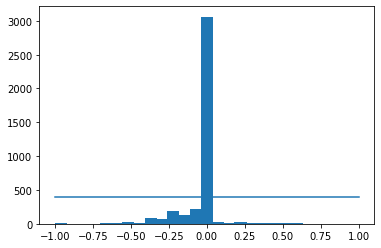

In [8]:
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.08)
plt.plot((np.min(data['steering']), np.max(data['steering'])), \
(samples_per_bin, samples_per_bin))

In [9]:
print('total data:', len(data))

total data: 3930


We wil specify a variable remove_list.We will specify samples we want to remove using looping construct through every single bin we will iterate through all the steering data. We will shuffle the data and romve some from it as it is now uniformly structured after shuffling.The output will be the distribution of steering angle that are much more uniform. There are significant amount of left steering angle and right steering angle eliminating the bias to drive straight all the time.

In [11]:
list_remove = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  list_remove.extend(list_)
print('removed:', len(list_remove))

removed: 2661


In [13]:
data.drop(data.index[list_remove], inplace=True)
print('remaining:', len(data))

remaining: 1269


Plot on it

In [14]:
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.08)
plt.plot((np.min(data['steering']), np.max(data['steering'])), \
(samples_per_bin, samples_per_bin))

In [15]:
print(data.iloc[1])

center      center_2022_04_10_12_24_42_256.jpg
left        left_2022_04_10_12_24_42_256.jpg  
right       right_2022_04_10_12_24_42_256.jpg 
steering   -0.05                              
throttle    0.01613                           
reverse     0                                 
speed       0.034646                          
Name: 6, dtype: object


We will now load the image into array to manipulate them accordingly. We will define a function named locd_img_steering. We will have image path as empty list and steering as empty list and then loop through. We use iloc selector as data frame based on the specific index we will use cut data for now.

In [16]:
def load_img_steering(datadir, df):
  path_of_image = []
  steering = []
  for index in range(len(data)):
    indexed_data = data.iloc[index]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    path_of_image.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    path_of_image.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    path_of_image.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  path_of_image = np.asarray(path_of_image)
  steerings = np.asarray(steering)
  return path_of_image, steerings
 
path_of_image, steerings = load_img_steering(datadir + '../input/udacity-self-driving-car-behavioural-cloning/self_driving_car_dataset_make/IMG', data)

We will be splitting the image path as well as storing arrays accordingly.

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(path_of_image, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 3045
Valid Samples: 762


We will have the histograms now.

Text(0.5, 1.0, 'Validation set')

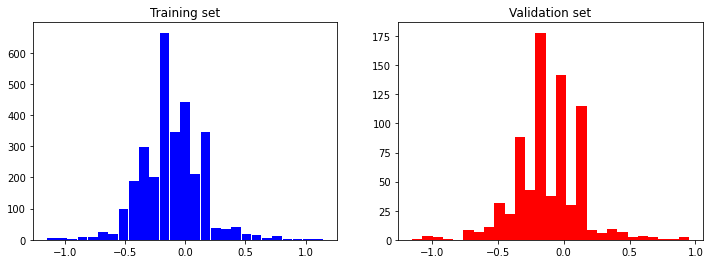

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.08, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.08, color='red')
axes[1].set_title('Validation set')

**Augmentation and image pre-processing**

The biggest challenge was generalizing the behavior of the car on Track_2 which it was never trained for. In a real-life situation, we can never train a self-driving car model for every track possible, as the data will be too huge to process. Also, it is not possible to gather the dataset for all the weather conditions and roads. Thus, there is a need to come up with an idea of generalizing the behavior on different tracks. This problem is solved using image preprocessing and augmentation techniques.

*Zoom*

The images in the dataset have relevant features in the lower part where the road is visible. The external environment above a certain image portion will never be used to determine the output and thus can be cropped. Approximately, 30% of the top portion of the image is cut and passed in the training set. The snippet of code and transformation of an image after cropping and resizing it to original image can be seen in below.

Text(0.5, 1.0, 'Zoomed Image')

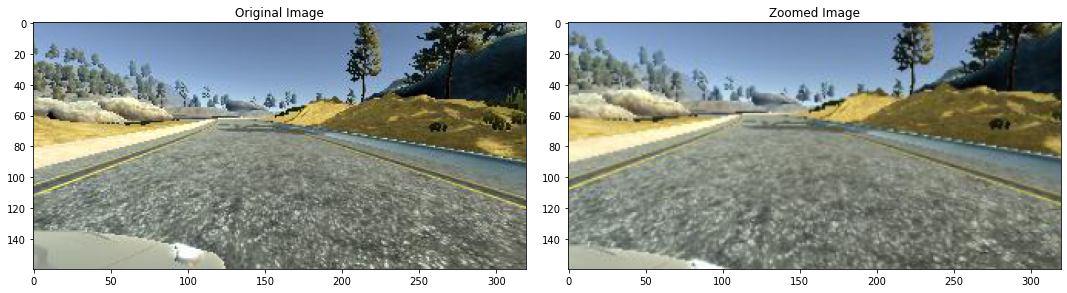

In [20]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image
image = path_of_image[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

*Shift (horizontal/vertical)*

The image is shifted by a small amount, it is vertical shift and horizontal shift as below.


Text(0.5, 1.0, 'Panned Image')

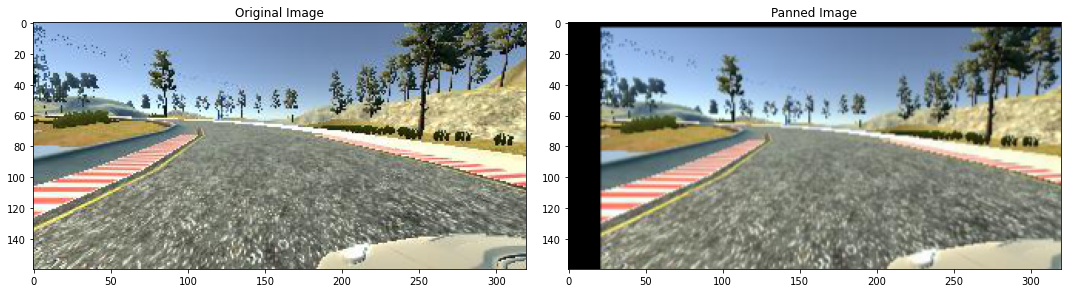

In [21]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image
image = path_of_image[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

*Brightness*

To generalize to the weather conditions with bright sunny day or cloudy, lowlight conditions, the brightness augmentation can prove to be very useful. The code snippet and increase of brightness can be seen below. Similarly, I have randomly also lowered down the level of brightness for other conditions. 


Text(0.5, 1.0, 'Brightness altered image ')

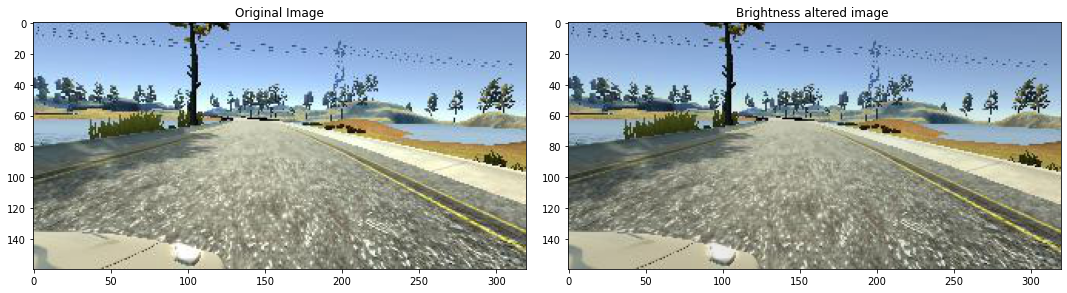

In [22]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image
image = path_of_image[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

*Flip (horizontal)*

The image is flipped horizontally (i.e. a mirror image of the original image is passed to the dataset). The motive behind this is that the model gets trained for similar kinds of turns on opposite sides too. This is important because Track 1 includes only left turns. The snippet of code and transformation of an image after flipping it can be seen in below.

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.25')

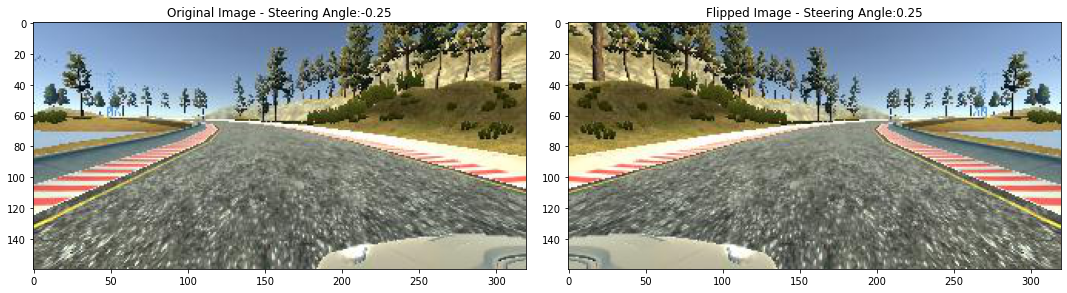

In [23]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle
random_index = random.randint(0, 1000)
image = path_of_image[random_index]
steering_angle = steerings[random_index]
 
 
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

To have a look what we have at this moment

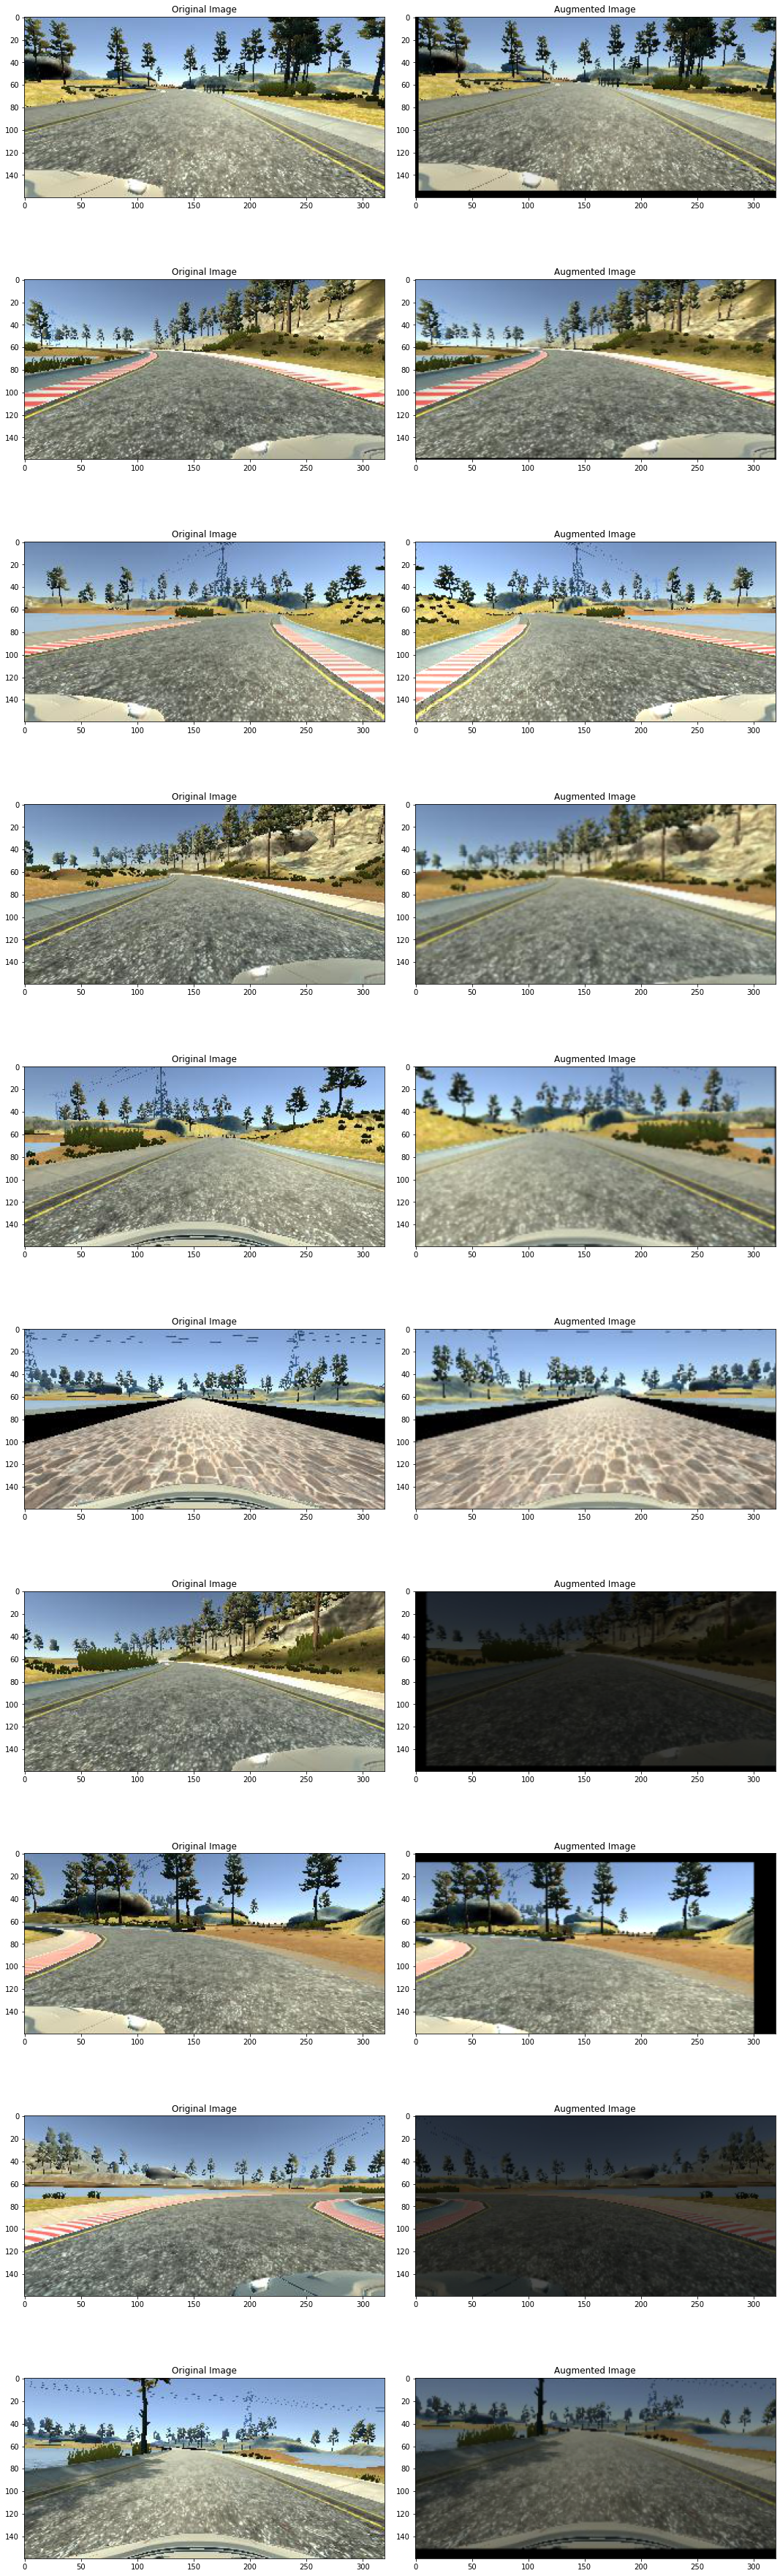

In [25]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)
    
    return image, steering_angle
ncol = 2
nrow = 10
 
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()
 
for index in range(10):
  randnum = random.randint(0, len(path_of_image) - 1)
  random_image = path_of_image[randnum]
  random_steering = steerings[randnum]
    
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)
    
  axs[index][0].imshow(original_image)
  axs[index][0].set_title("Original Image")
  
  axs[index][1].imshow(augmented_image)
  axs[index][1].set_title("Augmented Image")

I continued by doing some image processing. I cropped the image to remove the unnecessary features, changes the images to YUV format, used gaussian blur, decreased the size for easier processing and normalized the values

Text(0.5, 1.0, 'Preprocessed Image')

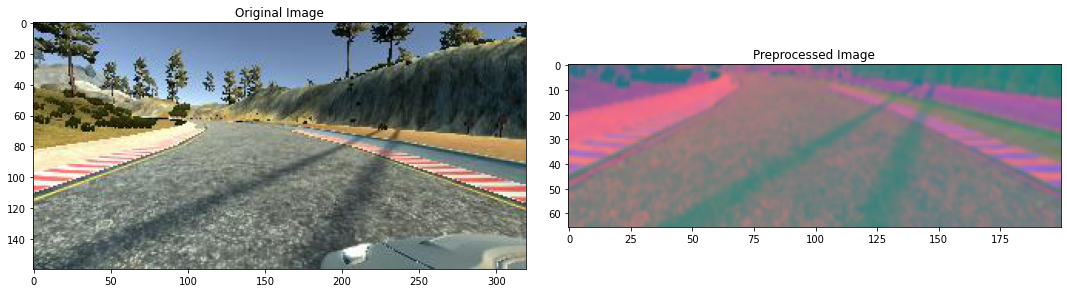

In [26]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img
image = path_of_image[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

To compare and visualize I plotted the original and the pre-processed image.

Text(0.5, 1.0, 'Preprocessed Image')

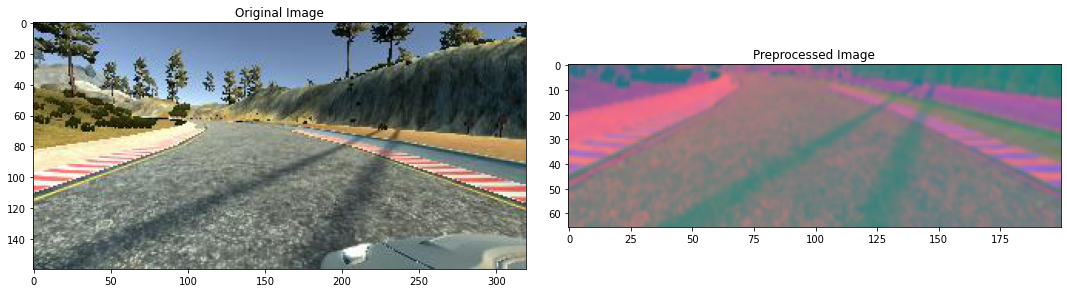

In [28]:
image = path_of_image[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [29]:
def batch_generator(path_of_image, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for index in range(batch_size):
      random_index = random.randint(0, len(path_of_image) - 1)
      
      if istraining:
        im, steering = random_augment(path_of_image[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(path_of_image[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering)) 

So far so good. Next, I converted all the images into numpy array.

Text(0.5, 1.0, 'Validation Image')

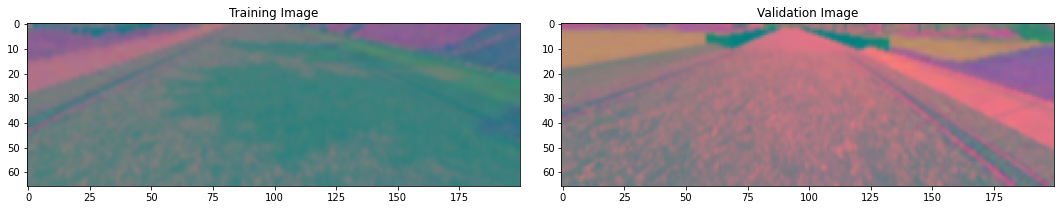

In [30]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')
 
axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

We will design our Model architecture. We have to classify the traffic signs too that's why we need to shift from Lenet 5 model to NVDIA model. With behavioural cloning, our dataset is much more complex then any dataset we have used.
We are dealing with images that have (200,66) dimensions.
Our current datset has 5386 images to train with but MNSIT has around 60,000 images to train with.
Our behavioural cloning code has simply has to return appropriate steering angle which is a regression type example.
For these things, we need a more advanced model which is provided by nvdia and known as nvdia model.The architecture of nvdia model is as shown below:
![](http://miro.medium.com/max/4800/1*2Z_8DB1ybUmRaHUsyi6bSA.png)

For defining the model architecture, we need to define the model object.
Normalization state can be skipped as we have already normalized it.
We will add the convolution layer.
As compared to the model, we will organize accordingly.
The Nvdia model uses 24 filters in the layer along with a kernel of size 5,5.
We will introduce sub sampling. The function reflects to stride length of the kernel as it processes through an image, we have large images.
Horizontal movement with 2 pixels at a time, similarly vertical movement to 2 pixels at a time.
As this is the first layer, we have to define input shape of the model too i.e., (66,200,3) and the last function is an activation function that is “elu”.

Revisting the model, we see that our second layer has 36 filters with kernel size (5,5) same subsampling option with stride length of (2,2) and conclude this layer with activation ‘elu’.

According to Nvdia model, it shows we have 3 more layers in the convolutional neural network. With 48 filters, with 64 filters (3,3) kernel 64 filters (3,3) kernel Dimensions have been reduced significantly so for that we will remove subsampling from 4th and 5th layer.

Next we add a flatten layer. We will take the output array from previous convolution neural network to convert it into a one dimensional array so that it can be fed to fully connected layer to follow.

Our last convolution layer outputs an array shape of (1,18) by 64.

We end the architecture of Nvdia model with a dense layer containing a single output node which will output the predicted steering angle for our self driving car. Now we will use model.compile() to compile our architecture as this is a regression type example the metrics that we will be using will be mean squared error and optimize as Adam. We will be using relatively a low learning rate that it can help on accuracy. We will use dropout layer to avoid overfitting the data. Dropout Layer sets the input of random fraction of nodes to “0” during each update. During this, we will generate the training data as it is forced to use a variety of combination of nodes to learn from the same data. We will have to separate the convolution layer from fully connected layer with a factor of 0.5 is added so it converts 50 percent of the input to 0. We Will define the model by calling the nvdia model itself. Now we will have the model training process.To define training parameters, we will use model.fit(), we will import our training data X_Train, training data ->y_train, we have less data on the datasets we will require more epochs to be effective. We will use validation data and then use Batch size.

In [31]:
def nvidiaModel():
  model = Sequential()
  model.add(Convolution2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation="elu"))
  model.add(Convolution2D(36,(5,5),strides=(2,2),activation="elu"))
  model.add(Convolution2D(48,(5,5),strides=(2,2),activation="elu")) 
  model.add(Convolution2D(64,(3,3),activation="elu"))   
  model.add(Convolution2D(64,(3,3),activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  
  model.add(Dense(100,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(50,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(10,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(1))
  model.compile(optimizer=Adam(lr=1e-3),loss="mse")
  
  return model

In [32]:
model = nvidiaModel()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout (Dropout)            (None, 1, 18, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

**Results**

The following results were observed for described architectures. I had to come up with two different performance metrics.
- Value loss or Accuracy (computed during training phase)
- Generalization on Track 1 (drive performance)


**Value loss or Accuracy**

The first evaluation parameter considered here is “Loss” over each epoch of the training run. To calculate value loss over each epoch, Keras provides “val_loss”, which is the average loss after that epoch. The loss observed during the initial epochs at the beginning of training phase is high, but it falls gradually, and that is evident by the screenshots below which shows the run of Architecture in the training phase.

In [33]:
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

Epoch 1/10
300/300 [==============================] - 322s 1s/step - loss: 0.1009 - val_loss: 0.0473
Epoch 2/10
300/300 [==============================] - 301s 1s/step - loss: 0.0642 - val_loss: 0.0431
Epoch 3/10
300/300 [==============================] - 293s 980ms/step - loss: 0.0614 - val_loss: 0.0406
Epoch 4/10
300/300 [==============================] - 287s 960ms/step - loss: 0.0598 - val_loss: 0.0409
Epoch 5/10
300/300 [==============================] - 290s 969ms/step - loss: 0.0574 - val_loss: 0.0387
Epoch 6/10
300/300 [==============================] - 295s 985ms/step - loss: 0.0568 - val_loss: 0.0409
Epoch 7/10
300/300 [==============================] - 290s 968ms/step - loss: 0.0569 - val_loss: 0.0386
Epoch 8/10
300/300 [==============================] - 296s 991ms/step - loss: 0.0558 - val_loss: 0.0392
Epoch 9/10
300/300 [==============================] - 289s 967ms/step - loss: 0.0562 - val_loss: 0.0380
Epoch 10/10
300/300 [==============================] - 285s 951ms/step

**Why We Use ELU Over RELU**

We can have dead relu this is when a node in neural network essentially dies and only feeds a value of zero to nodes which follows it. We will change from relu to elu. Elu function has always a chance to recover and fix it errors means it is in a process of learning and contributing to the model. We will plot the model and then save it accordingly in h5 format for a keras file.

Text(0.5, 0, 'Epoch')

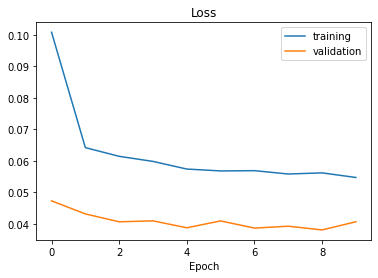

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

We will save the model.

In [35]:
model.save('model_new.h5')